# Unsupervised Learning with K-Means and PCA

This is a starter notebook for the assignment, as outlined in the accompanying README file. Learners are expected to complete and deliver all their work for this portion of the assignment within this notebook.

In [33]:
#Preparing and loading the libraries to be used
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np


In [34]:
# loading the data from csv to panda dataframe
data = pd.read_csv('Wholesale_customers.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [42]:
# Exploring the data by analysing the first five rows of the dataset
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


From the first five rows of the dataset it can be seen that the data has 6 important product categories which are Fresh,Milk,Grocery,Frozen, Detergents and paper and lastly Dellicassen.

In [36]:
#Processing the dataset and cleaning it

# Check the structure and the summary of the data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [37]:
# Checking for missing values that appear as null
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no null values in the data, all the values are either of integer or float type.

In [38]:
# removing 'Channel' and 'Region' out of the data
data_cleaned = data.drop(['Channel', 'Region'], axis=1)

Since PCA is sensitive to the scale of the data, it is important to standardise the data by  the use of scaling

In [41]:
#scaling the data to ensure all features are on the same scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)
scaled_data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

Dimensionality reduction using PCA ensures that the dimensions are reduced while preserving essential information. It ensures that data has a mean of 0 and a standard deviation of one

In [ ]:
#importing library
from sklearn.decomposition import PCA

In [ ]:
#choosing the number of components I want to reduce the data to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])
principal_df.head()

,PC1,PC2
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434


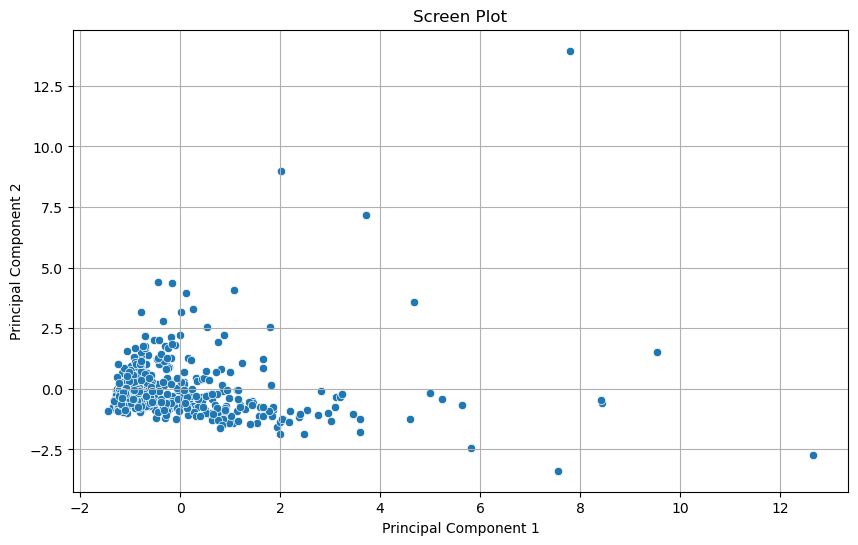

In [53]:
#To get a better understanding of the results of PCA,I'm going to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('Screen Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

K-Means Clustering
Applying K-means clustering to segment the customers, I'll start with the Elbow method

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [61]:
#Elbow method 

inertia = []

for n in range(1,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


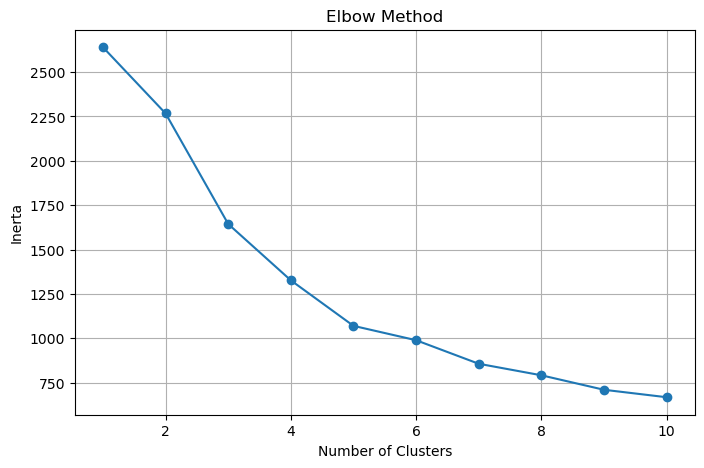

In [62]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inerta')
plt.grid(True)
plt.show()

Finding the Elbow point: The inertia decreases sharply as clusters increase
The best is at the elbow where adding more clusters barely reduces inertia, in this plot, K=3 or 5 seem optimal

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
#silhouette method

silhouette = []
for n in range (2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    score = silhouette_score(scaled_data,labels)
    silhouette.append(score)
    
    


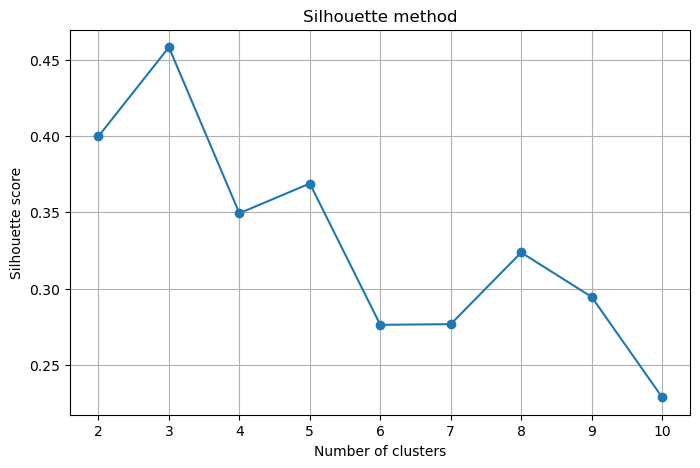

In [85]:
import matplotlib.pyplot as plt

cluster_range=list(range(2,11))

plt.figure(figsize=(8,5))
plt.plot(cluster_range,silhouette,marker='o', linestyle='-')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [86]:
#Choosing k=3 as the optimum k based on the elbow point and the highest silhouette point=0.45
#Comparing clustering Raw vs PCA

#Fitting KMeans to original scaled data
k_optimal=3
kmeans_raw=KMeans(n_clusters=k_optimal,random_state=42).fit(scaled_data)
sil_raw=silhouette_score(scaled_data,kmeans_raw.labels_)

#fitting KMeans to PCA data
kmeans_pca=KMeans(n_clusters=k_optimal,random_state=42).fit(principal_components)
sil_pca=silhouette_score(principal_components,kmeans_pca.labels_)

print(f"Silhouette Score(Raw Data) : {sil_raw:.4f}")
print(f"Silhouette Score(PCA Data) : {sil_pca:.4f}")

Silhouette Score(Raw Data) : 0.4583
Silhouette Score(PCA Data) : 0.3817


The raw data indicates moderate clustering quality. The clusters are reasonably well presented in the original feature space. The PCA data score is lower, indicating a decrease in clustering quality after applying PCA. Perhaps I picked made an error somewhere hence clustering on the raw data performed better than the PCA reduced data

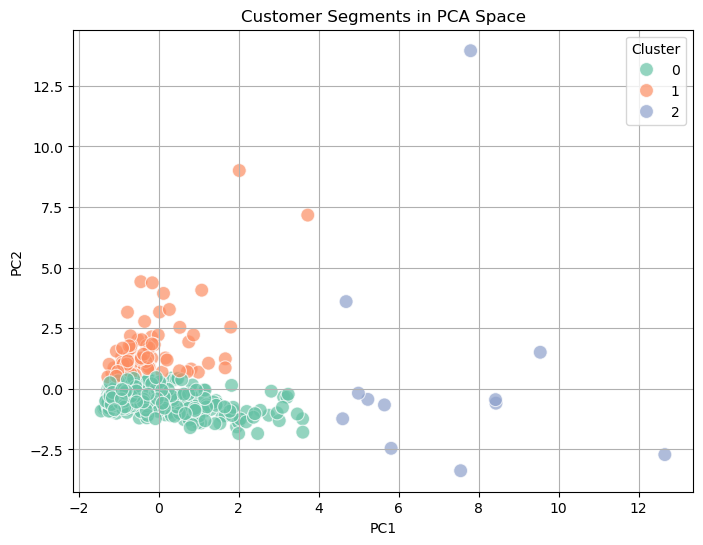

In [90]:
#Visualising the structure in the PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=principal_components[:,0], y=principal_components[:,1],
    hue=kmeans_pca.labels_, palette='Set2', s=100, alpha=0.7
)
plt.title('Customer Segments in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
           

The cluster segments show a great number of outliers for cluster 2

In [91]:
#PCA Component contribution interpretation through showing feature contributons to PC1 and PC2 
pca_components = pd.DataFrame(pca.components_, columns=data_cleaned.columns, index=['PC1','PC2'])
pca_components.T

,PC1,PC2
Fresh,0.042884,0.527932
Milk,0.545118,0.083168
Grocery,0.579256,-0.146088
Frozen,0.051189,0.611278
Detergents_Paper,0.548640,-0.255233
Delicassen,0.248682,0.504207


PC1 shows bulk purchasing of non-perishables, and most likely represents retail shops and household goods.
PC2 represents busiinesses that specialise with fresh,frozen or baked goods. perishables that are sold quickly 

In [93]:
#Adding cluster labels to original data
data_with_labels = data_cleaned.copy()
data_with_labels['Cluster'] = kmeans_raw.labels_

#Analyze cluster characterstics
cluster_summary = data_with_labels.groupby('Cluster').mean()
cluster_summary

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351


Cluster 0 has moderate purchasing on all categories, suggesting small to medium businesses or general households. cluster one would need incentives such as loyalty program to purchase more

Cluster 1 has extremely high purchasing on fresh foods, high spending on frozen suggesting fresh food businesses like markets,caterers and restaurants.

Cluster 2 has a high purchasing on non-perishables,suggesting retail stores like supermarkets that buy non-perishable items in bulk.Sales that promote buying in bulk would target cluster two.